In [15]:
## 패키지 import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [16]:
## 'data_modified'에서 전치리된 csv파일을 읽어와서 분석해주십시오.
## 담당자: 심동현
# 데이터 불러오기
data = pd.read_csv("./data_modified/team_comparison.csv")

In [17]:
# 리버풀 선수들과 레알마드리드 선수들을 분리 (Overall 기준)
lp = data[data['Club']=='Liverpool'].sort_values(by='Overall',ascending=False)
rm = data[data['Club']=='Real Madrid CF'].sort_values(by='Overall',ascending=False)
mc = data[data['Club']=='Manchester City'].sort_values(by='Overall',ascending=False)

In [18]:
# Best Position의 unique 값 확인
data['Best Position'].unique()

array(['CM', 'CB', 'RB', 'CDM', 'RW', 'LW', 'CF', 'RM', 'LB', 'CAM',
       'LWB', 'ST', 'RWB', 'GK', 'LM'], dtype=object)

In [19]:
# 각 포지션 별 리스트 작성
gk_list=['GK']
cb_list=['CB','RB','LB','RWB','LWB']
mf_list=['CAM','CM','CDM','LM','RM']
st_list=['ST','LW','RW','CF']

In [20]:
# 주전 선수 선발 함수 정의
def select_best_players(team_df, gk_count=1, cb_count=4, mf_count=4, st_count=2):
    selected_ids = []
    for index in team_df.index:
        if team_df.loc[index, 'Best Position'] in gk_list and gk_count > 0:
            selected_ids.append(team_df.loc[index, 'ID'])
            gk_count -= 1
        elif team_df.loc[index, 'Best Position'] in cb_list and cb_count > 0:
            team_df.at[index, 'Best Position'] = 'CB'
            selected_ids.append(team_df.loc[index, 'ID'])
            cb_count -= 1
        elif team_df.loc[index, 'Best Position'] in mf_list and mf_count > 0:
            team_df.at[index, 'Best Position'] = 'MF'
            selected_ids.append(team_df.loc[index, 'ID'])
            mf_count -= 1
        elif team_df.loc[index, 'Best Position'] in st_list and st_count > 0:
            team_df.at[index, 'Best Position'] = 'ST'
            selected_ids.append(team_df.loc[index, 'ID'])
            st_count -= 1
    return team_df[team_df['ID'].isin(selected_ids)]

In [21]:
# 리버풀, 레알 마드리드, 맨체스터 시티 선수 데이터를 정렬
lp = data[data['Club'] == 'Liverpool'].sort_values(by='Overall', ascending=False)
rm = data[data['Club'] == 'Real Madrid CF'].sort_values(by='Overall', ascending=False)
mc = data[data['Club'] == 'Manchester City'].sort_values(by='Overall', ascending=False)

In [22]:
# 각 팀의 주전 선수 선별
lp_selected = select_best_players(lp)
rm_selected = select_best_players(rm)
mc_selected = select_best_players(mc)

In [23]:
# 데이터 통합
df_selected = pd.concat([lp_selected, rm_selected, mc_selected], axis=0)

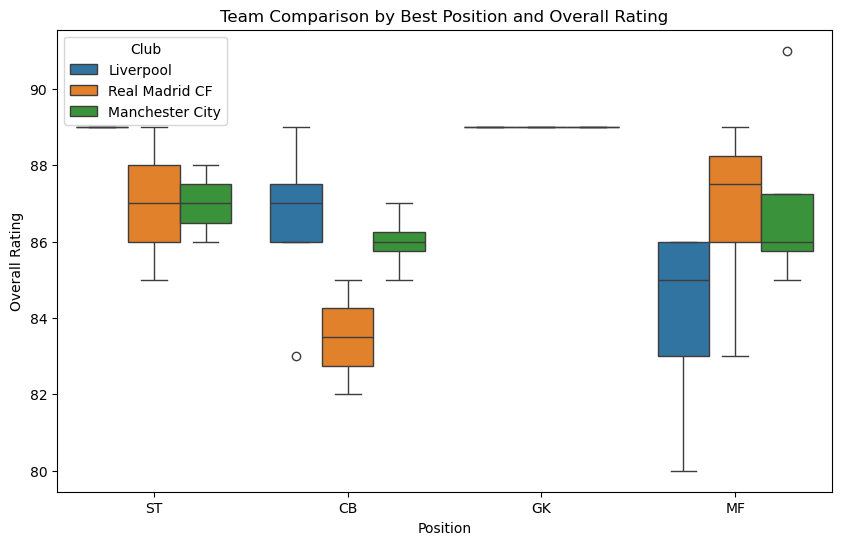

In [24]:
# 시각화: Best Position과 Overall 점수 비교
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_selected, x='Best Position', y='Overall', hue='Club')
plt.title('Team Comparison by Best Position and Overall Rating')
plt.xlabel('Position')
plt.ylabel('Overall Rating')
plt.show()

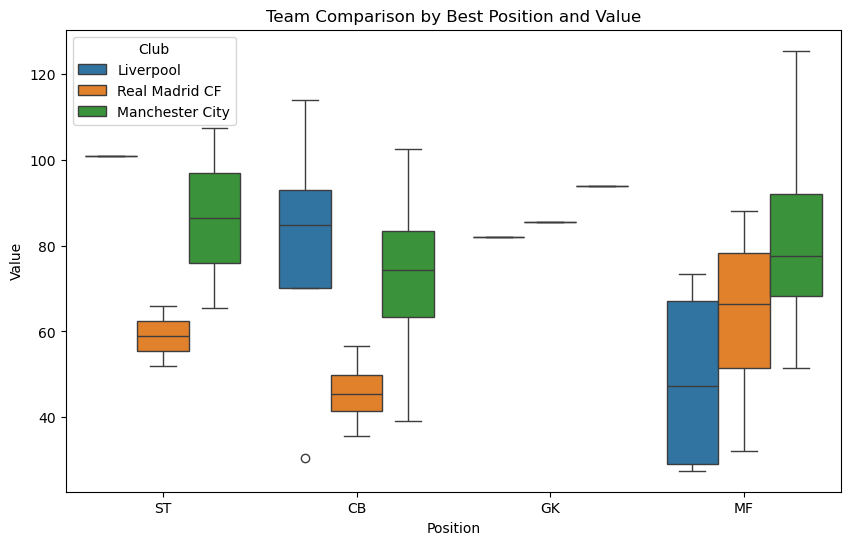

In [25]:
# 시각화: Best Position과 Value 비교
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_selected, x='Best Position', y='Value', hue='Club')
plt.title('Team Comparison by Best Position and Value')
plt.xlabel('Position')
plt.ylabel('Value')
plt.show()

In [27]:
# 각각 별도의 CSV 파일로 저장
lp.to_csv('./data_modified/liverpool_players.csv', index=False)
rm.to_csv('./data_modified/real_madrid_players.csv', index=False)
mc.to_csv('./data_modified/manchester_city_players.csv', index=False)